In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits import mplot3d
import mpl_toolkits.mplot3d as m3d


In [70]:
# set plot preference 
sns.set_style('white') # white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

In [46]:
# Load data
df = pd.read_csv("final.csv")

# Log transform data, + 1 to avoid 0 values 
df["log_mla"] = np.log(df["num_mla_entries"] + 1)
df["log_count"] = np.log(df["rating_and_review_count"] + 1)
df.drop(columns=df.columns[0], axis=1, inplace=True)

df = pd.DataFrame(df)

df.head()

,Author,Cliche,cliche_ratio,average_rating,num_mla_entries,rating_and_review_count,log_mla,log_count
0,Grace Aguilar,3679,0.006184,3.27,27,420,3.332205,6.042633
1,William Harrison Ainsworth,9763,0.005845,3.41,50,841,3.931826,6.735780
2,Edwin Lester Arnold,1112,0.006890,3.11,5,265,1.791759,5.583496
3,Jane Austen,8646,0.005951,4.10,5593,4821643,8.629450,15.388626
4,E.F. Benson,21578,0.008169,4.04,21,26613,3.091042,10.189193


<bound method Figure.tight_layout of <Figure size 1000x1000 with 4 Axes>>

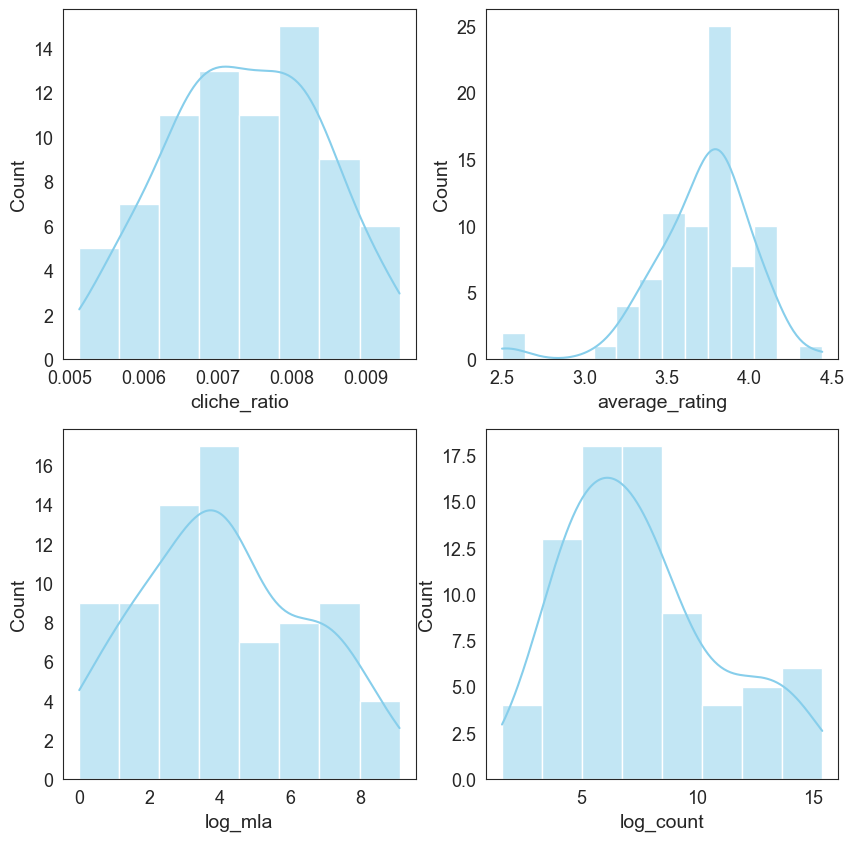

In [82]:
fig, axes = plt.subplots(2, 2, figsize = (10,10))

sns.histplot(data=df, x="cliche_ratio", kde=True,color="skyblue", ax=axes[0,0])
sns.histplot(data=df, x="average_rating", kde=True, color="skyblue",ax=axes[0,1])
sns.histplot(data=df, x="log_mla", kde=True, color="skyblue",ax=axes[1,0])
sns.histplot(data=df, x="log_count", kde=True,color="skyblue", ax=axes[1,1])

fig.tight_layout

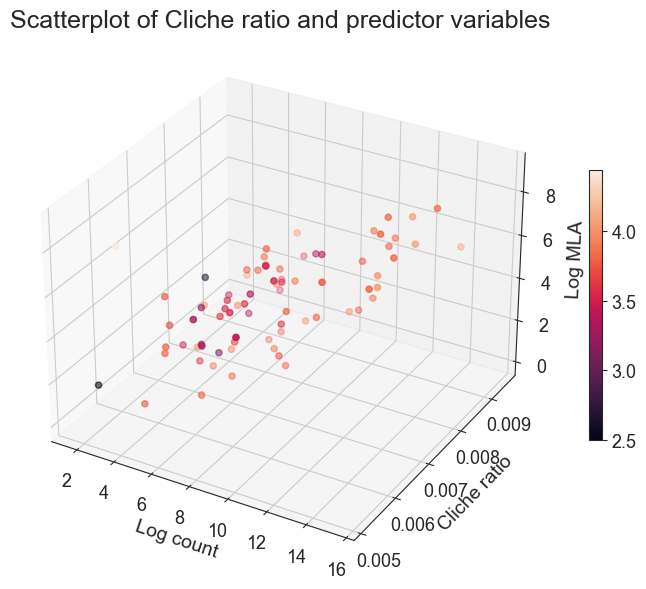

In [72]:
# Creating dataset
z = df["log_mla"]
x = df["log_count"]
y = df["cliche_ratio"]
c = df["average_rating"]
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
sctt = ax.scatter3D(x, y, z, c = c)

plt.title("Scatterplot of Cliche ratio and predictor variables")
ax.set_xlabel("Log count") 
ax.set_ylabel("Cliche ratio")
ax.set_zlabel("Log MLA")
fig.colorbar(sctt, ax= ax, shrink = 0.5)


# show plot
plt.show()

4.939362712103354e-05
0.006997796168806459


Text(0.5, 1.0, 'Cliche Ratio vs log Review and Rating Count')

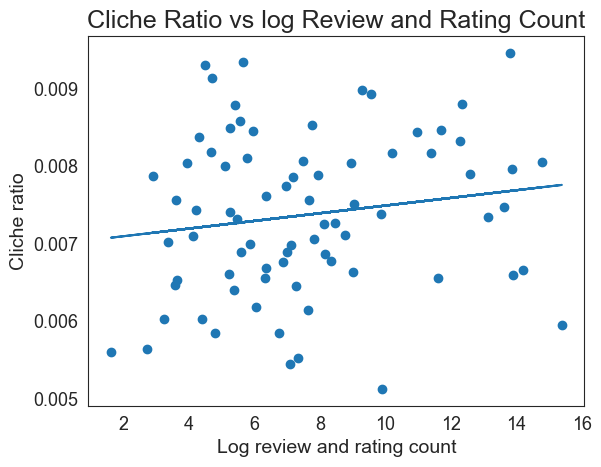

In [77]:
x = df["log_count"]
y = df["cliche_ratio"]

# line of best fit
a, b = np.polyfit(x, y, 1)
print(a)
print(b)

# add points + linex
plt.scatter(x,y)
plt.plot(x, a*x+b)
plt.xlabel("Log review and rating count")
plt.ylabel("Cliche ratio")
plt.title("Cliche Ratio vs log Review and Rating Count")

-5.2021486425581016e-05
0.00758583288975334


Text(0.5, 1.0, 'Cliche Ratio vs Log MLA Entry')

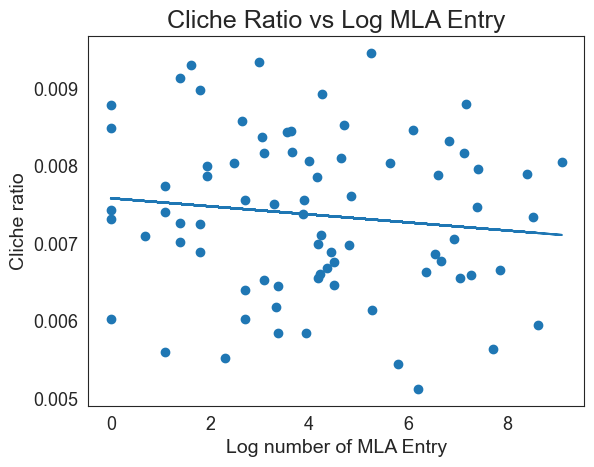

In [78]:
x = df["log_mla"]
y = df["cliche_ratio"]

# line of best fit
a, b = np.polyfit(x, y, 1)
print(a)
print(b)


# add points + line
plt.scatter(x,y)
plt.plot(x, a*x+b)

plt.xlabel("Log number of MLA Entry")
plt.ylabel("Cliche ratio")
plt.title("Cliche Ratio vs Log MLA Entry")

0.0006710079854323366
0.004881772013228953


Text(0.5, 1.0, 'Cliche Ratio vs Average Rating')

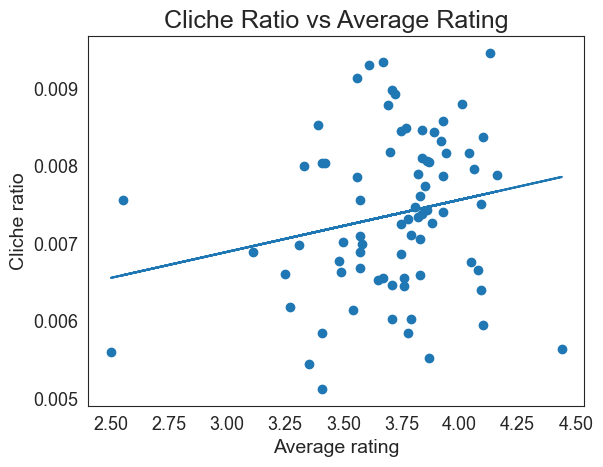

In [79]:
x = df["average_rating"]
y = df["cliche_ratio"]

# line of best fit
a, b = np.polyfit(x, y, 1)
print(a)
print(b)

# add points + line
plt.scatter(x,y)
plt.plot(x, a*x+b)

plt.xlabel("Average rating")
plt.ylabel("Cliche ratio")
plt.title("Cliche Ratio vs Average Rating")